In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, recall_score
from sklearn.preprocessing import StandardScaler 

datasetDiabetes = pd.read_csv("../diabetes.csv")
datasetDiabetes

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [2]:
# Verificar valores nulos en el DataFrame
valores_nulos = datasetDiabetes.isnull().sum()
print(valores_nulos)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [3]:
from IPython.display import display

statistics = datasetDiabetes.describe()

print("Estadisticas de los valores:")
print(statistics)

Estadisticas de los valores:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min   

c:\Users\kenny\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


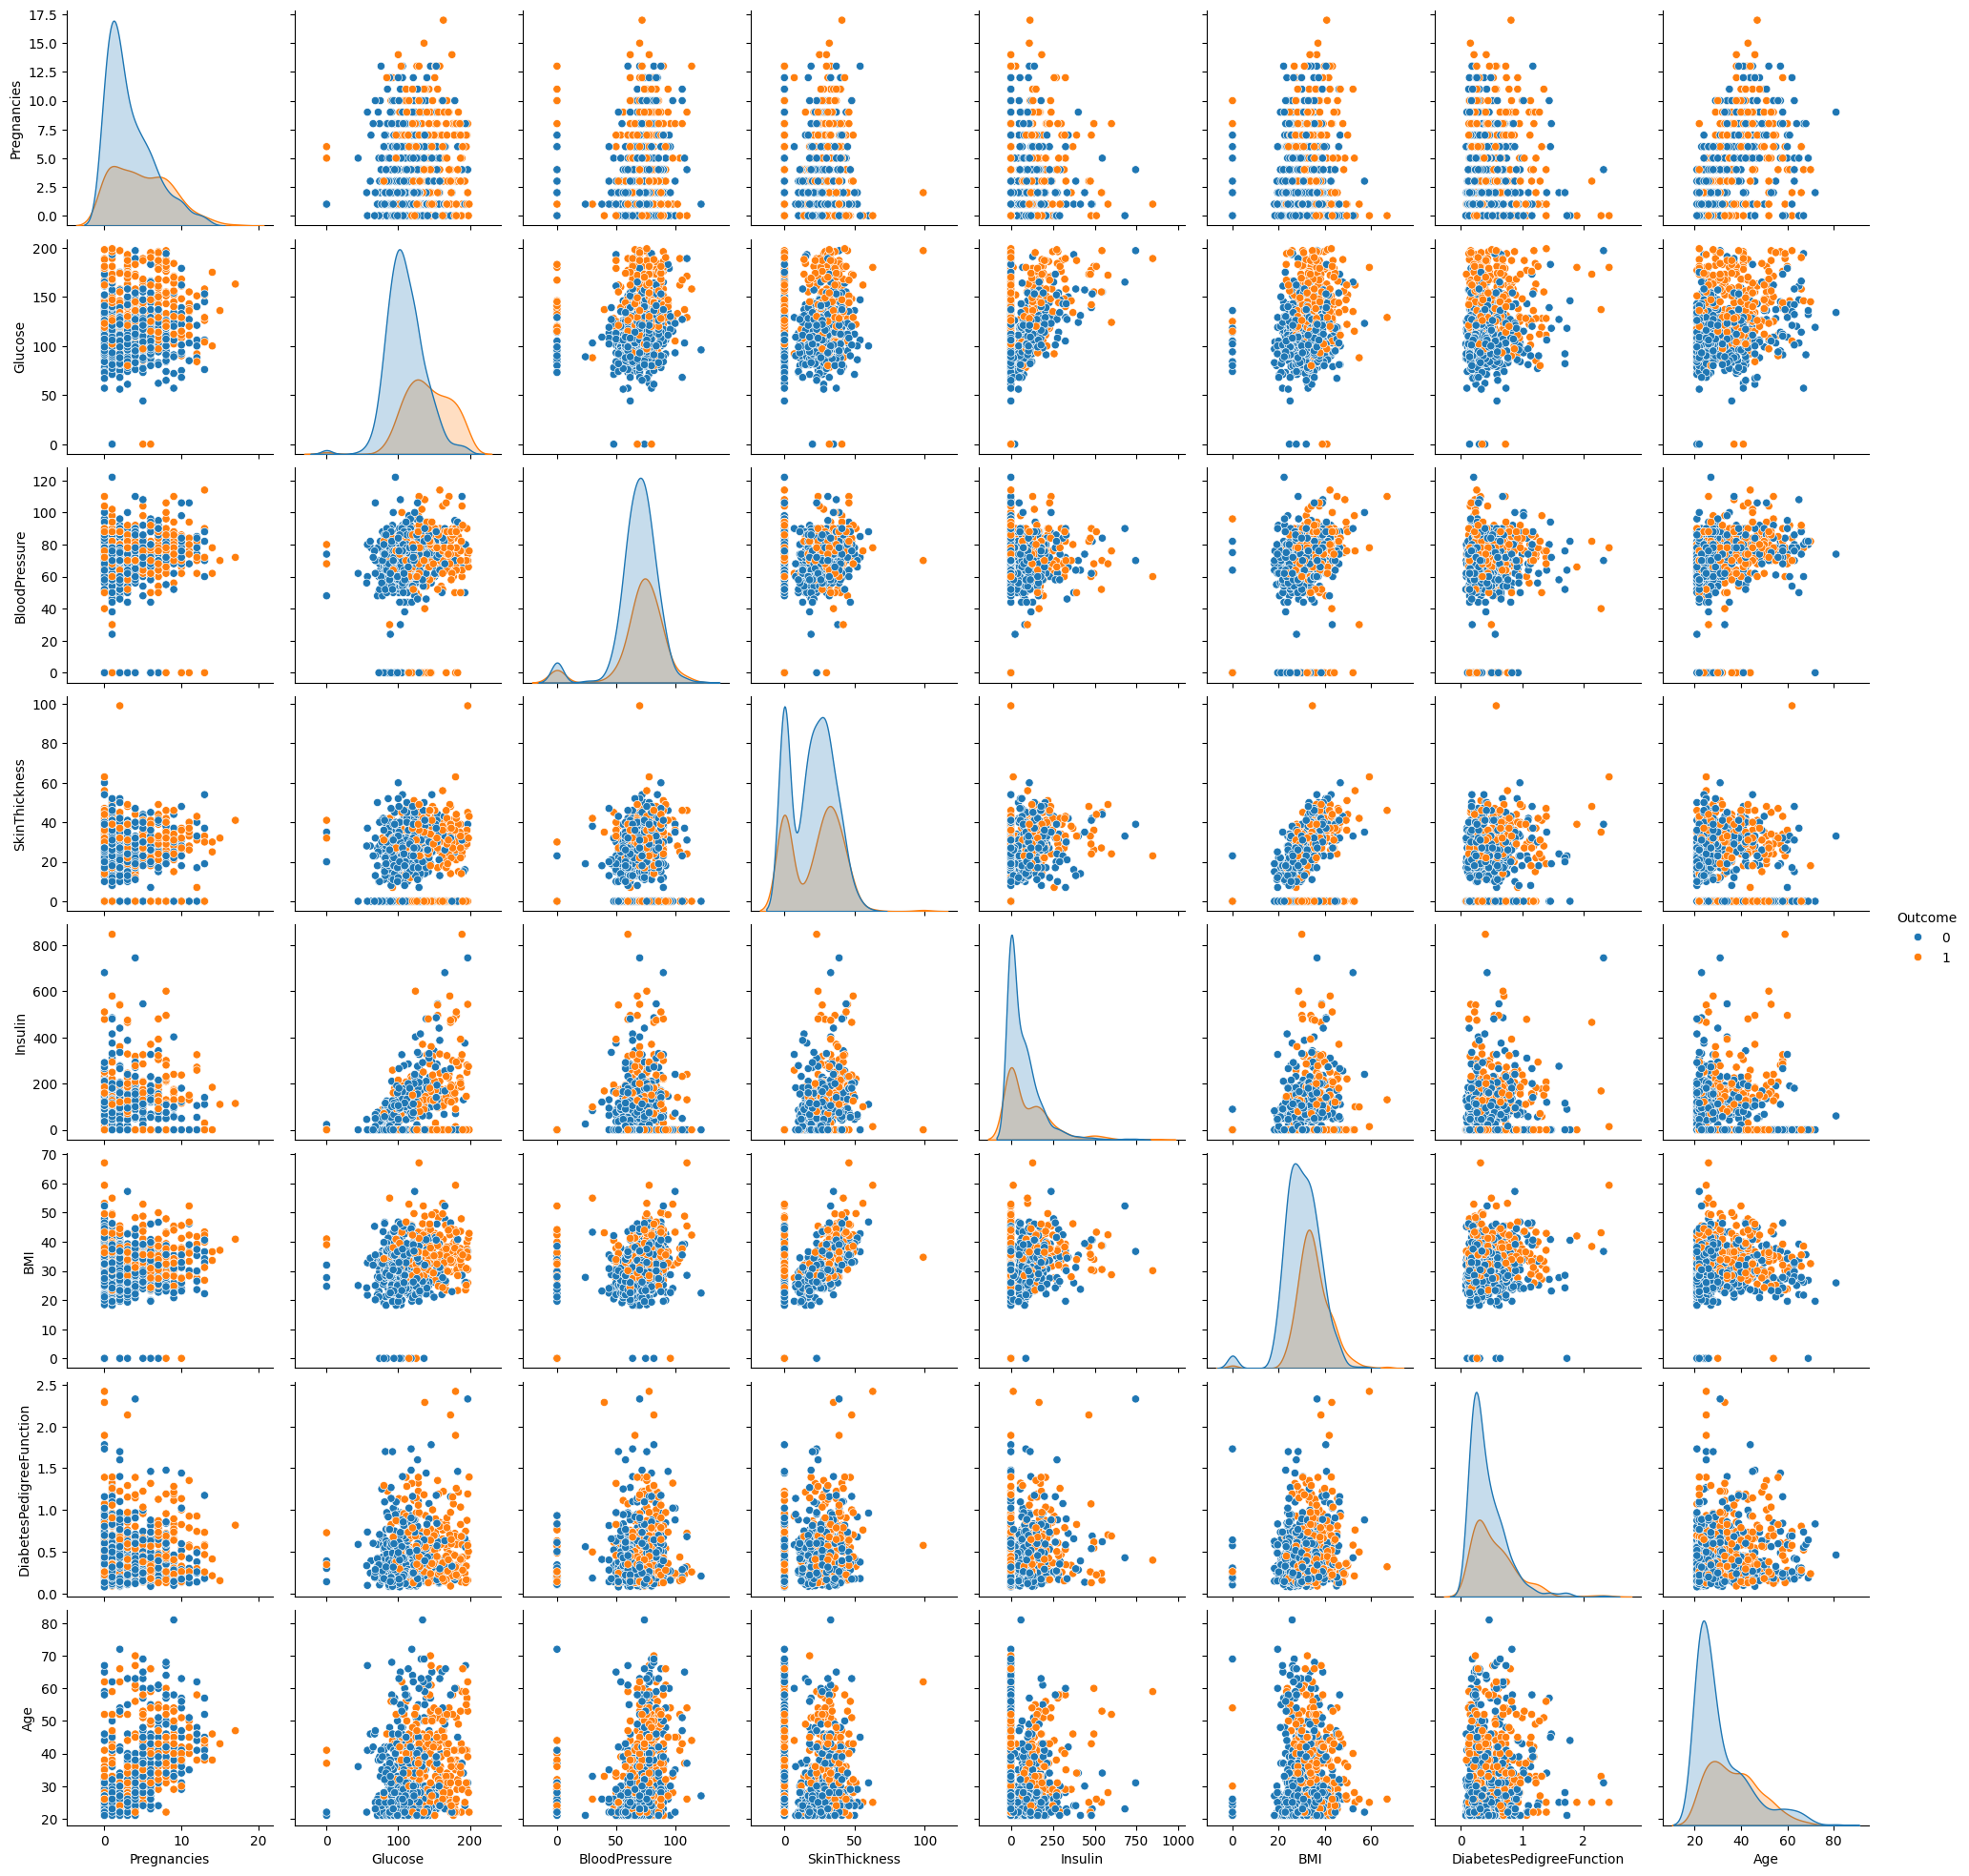

In [4]:
# Visualización de relaciones entre características
sns.pairplot(datasetDiabetes, hue='Outcome')
plt.show()

In [5]:
# Reemplazar los valores de 0 por NaN en las columnas específicas
columnas_con_valores_cero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
datasetDiabetes[columnas_con_valores_cero] = datasetDiabetes[columnas_con_valores_cero].replace(0, pd.NA)

# Calcular la media de las columnas para casos con Outcome = 1 (diabetes)
media_diabetes = datasetDiabetes[datasetDiabetes['Outcome'] == 1].mean()

# Calcular la media de las columnas para casos con Outcome = 0 (no diabetes)
media_no_diabetes = datasetDiabetes[datasetDiabetes['Outcome'] == 0].mean()

# Imputar los valores faltantes con la media condicional según Outcome
for columna in columnas_con_valores_cero:
    # Imputar la media de los casos con diabetes para valores faltantes
    datasetDiabetes.loc[(datasetDiabetes[columna].isnull()) & (datasetDiabetes['Outcome'] == 1), columna] = media_diabetes[columna]
    # Imputar la media de los casos sin diabetes para valores faltantes
    datasetDiabetes.loc[(datasetDiabetes[columna].isnull()) & (datasetDiabetes['Outcome'] == 0), columna] = media_no_diabetes[columna]

# Pasar todos los valores a numericos
datasetDiabetes['Glucose'] = pd.to_numeric(datasetDiabetes['Glucose'], errors='coerce')
datasetDiabetes['BloodPressure'] = pd.to_numeric(datasetDiabetes['BloodPressure'], errors='coerce')
datasetDiabetes['SkinThickness'] = pd.to_numeric(datasetDiabetes['SkinThickness'], errors='coerce')
datasetDiabetes['Insulin'] = pd.to_numeric(datasetDiabetes['Insulin'], errors='coerce')
datasetDiabetes['BMI'] = pd.to_numeric(datasetDiabetes['BMI'], errors='coerce')

In [6]:
# Seleccionar solo algunas columnas para el resumen estadístico
selected_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
statistics = datasetDiabetes[selected_columns].describe()

# Imprimir el resumen estadístico
print("Valores faltantes en el conjunto de datos:")
print(statistics)

Valores faltantes en el conjunto de datos:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.697358      72.428141      29.247042  157.003527   
std       3.369578   30.462008      12.106044       8.923908   88.860914   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      28.000000  130.287879   
75%       6.000000  141.000000      80.000000      33.000000  206.846154   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

             BMI  DiabetesPedigreeFunction         Age  
count  768.00000                768.000000  768.000000  
mean    32.44642                  0.471876   33.240885  
std      6.87897                  0.331329   11.760232  
min     18.20000                  0.078000  

c:\Users\kenny\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


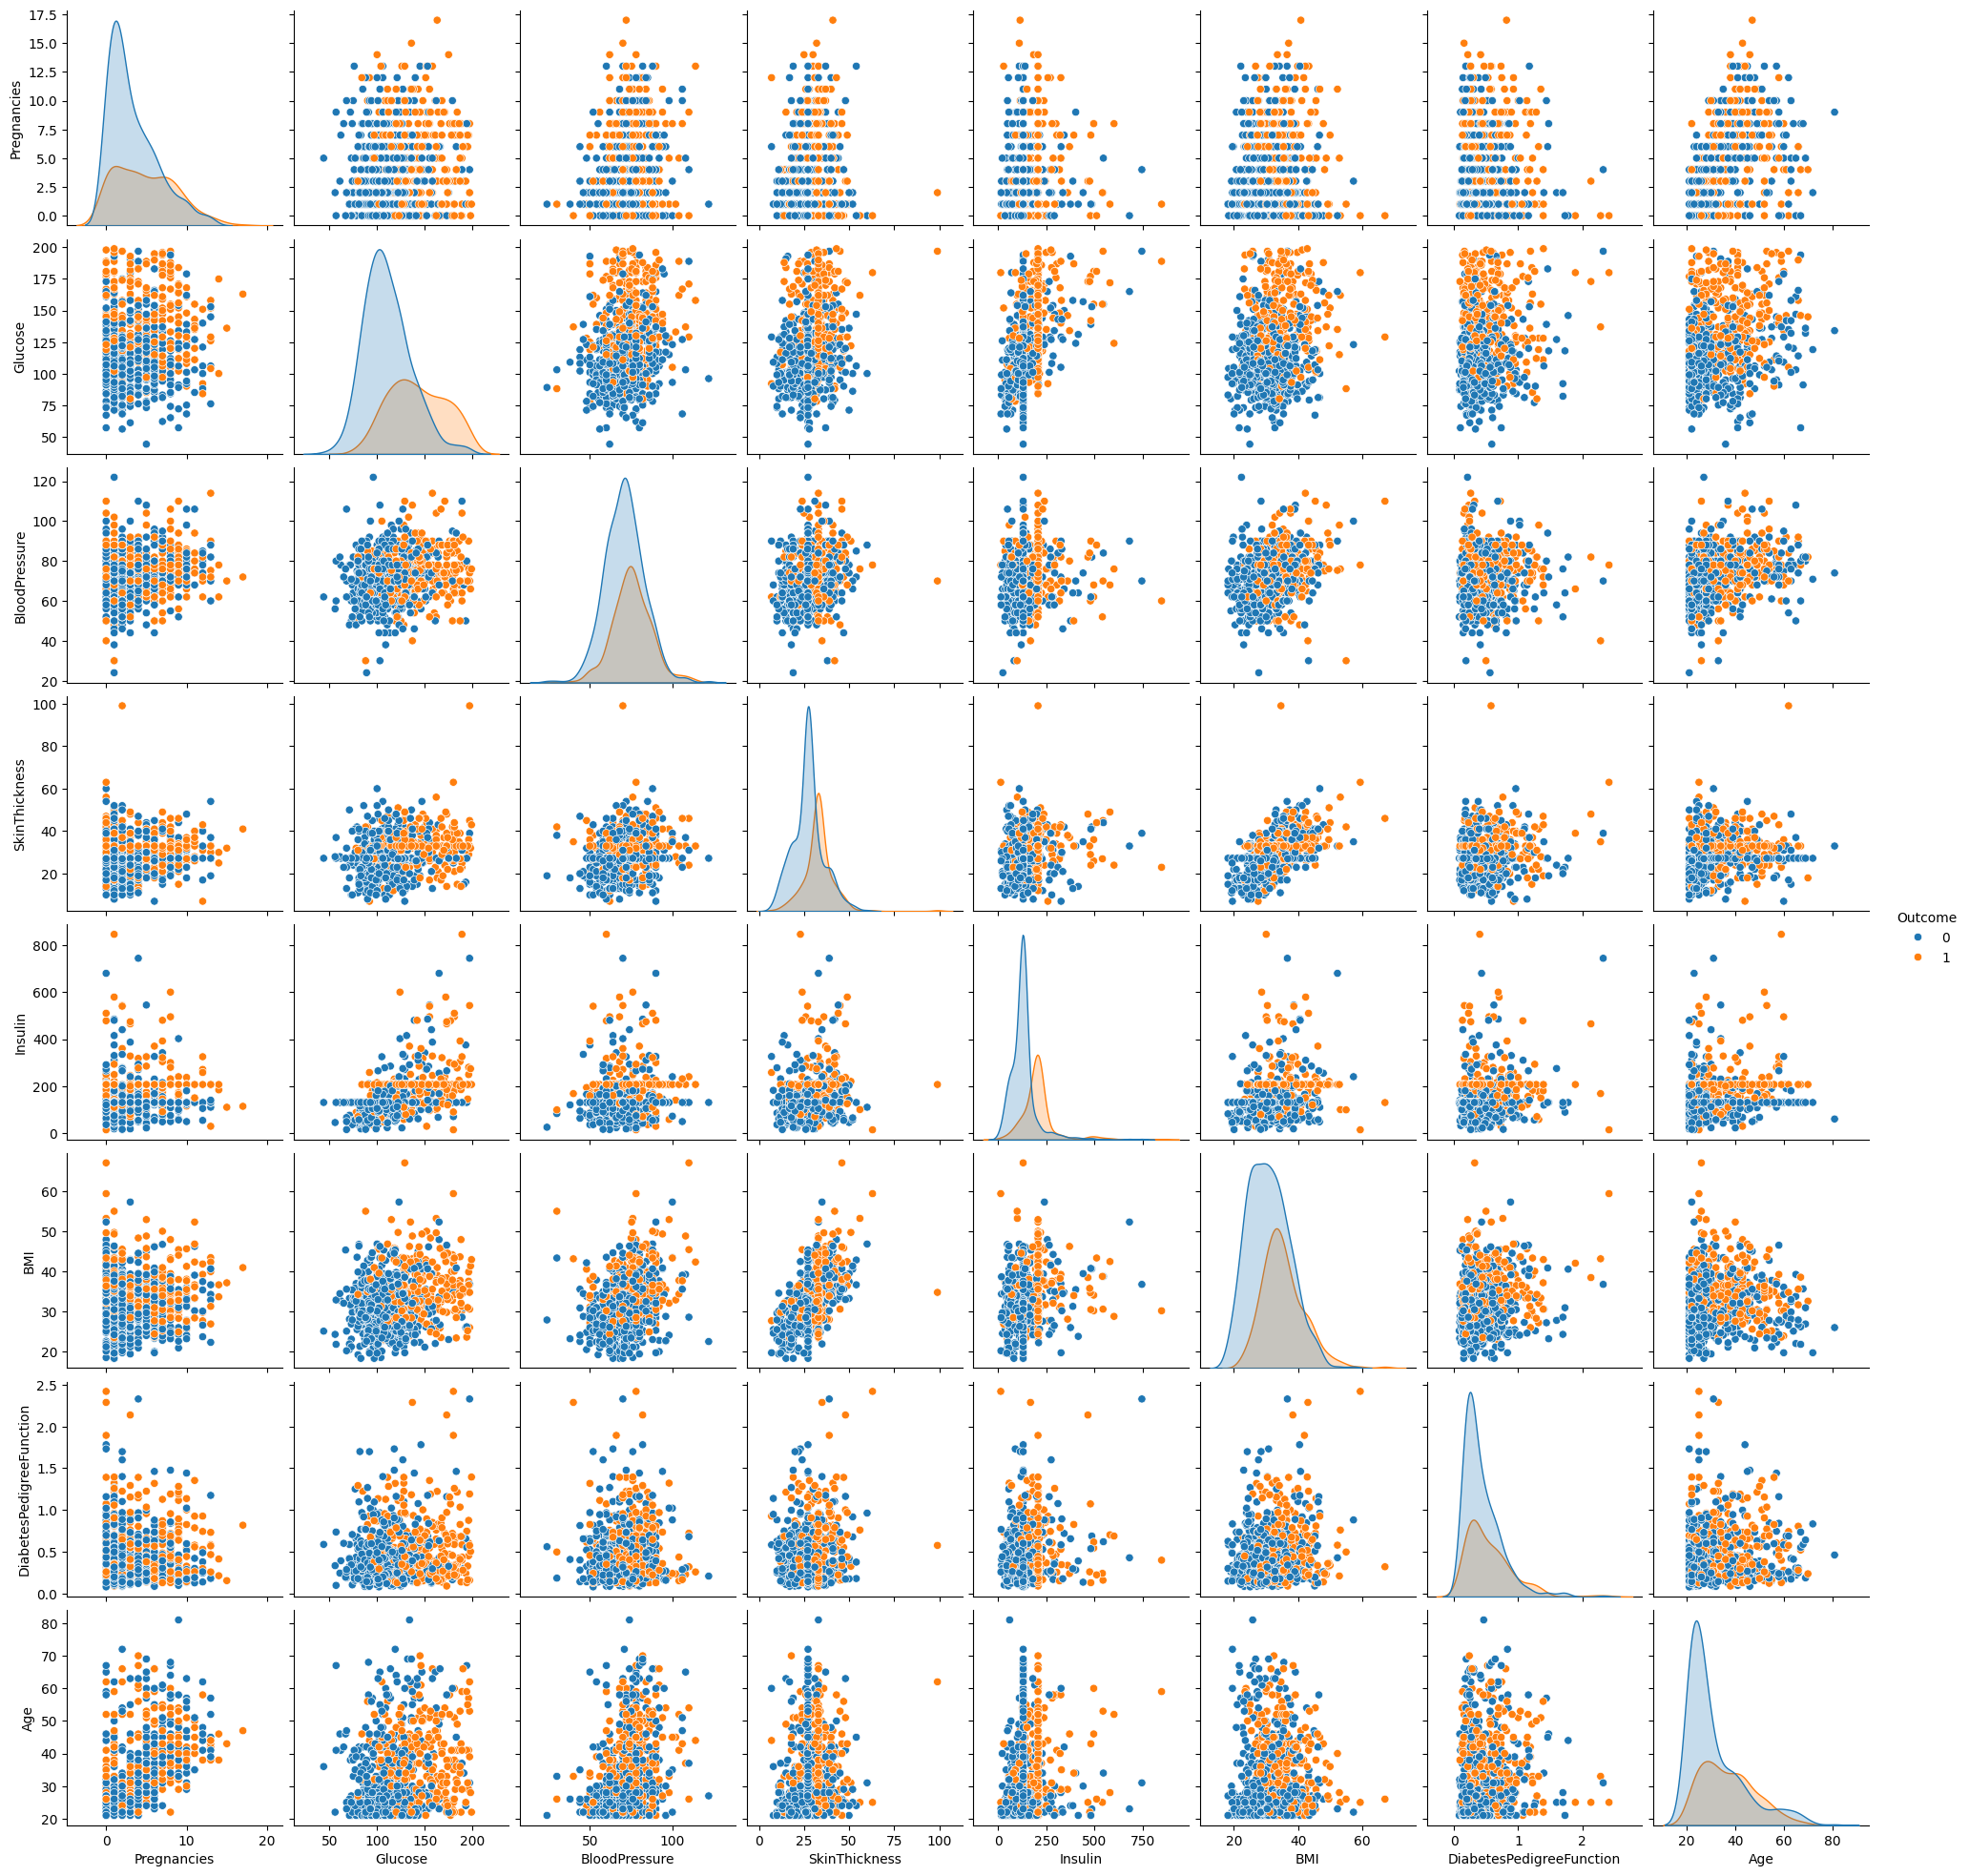

In [7]:
# Visualización de relaciones entre características
sns.pairplot(datasetDiabetes, hue='Outcome')
plt.show()

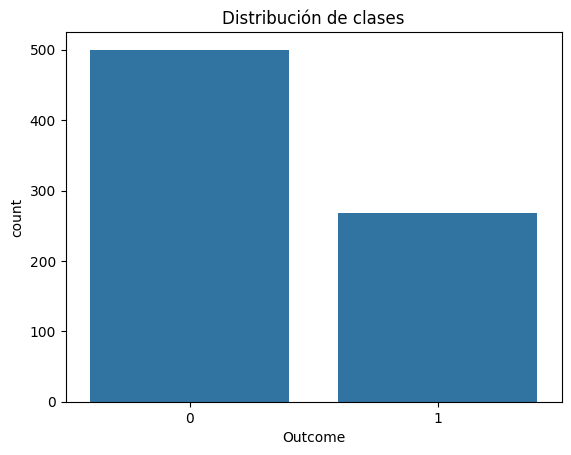

In [8]:
# Visualización de la distribución de las clases
sns.countplot(x='Outcome', data=datasetDiabetes)
plt.title('Distribución de clases')
plt.show()

In [9]:
# Calcular la matriz de correlación
correlation_matrix = datasetDiabetes.corr()

# Seleccionar la columna de correlaciones con respecto a la variable "Outcome"
correlation_with_outcome = correlation_matrix['Outcome'].abs().sort_values(ascending=False)

# Mostrar las características con las correlaciones más altas con respecto a la variable "Outcome"
print("Características con mayor correlación con respecto a Outcome:")
print(correlation_with_outcome)

Características con mayor correlación con respecto a Outcome:
Outcome                     1.000000
Glucose                     0.495954
Insulin                     0.410918
BMI                         0.315271
SkinThickness               0.308094
Age                         0.238356
Pregnancies                 0.221898
BloodPressure               0.175087
DiabetesPedigreeFunction    0.173844
Name: Outcome, dtype: float64


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [11]:
X = datasetDiabetes.drop(columns=['Outcome'])
y = datasetDiabetes['Outcome']

# Dividir los datos en conjuntos de entrenamiento y prueba
trainingDataSetDiabetes, testingDataSetDiabetes, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento de datos: Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(trainingDataSetDiabetes)
X_test_scaled = scaler.transform(testingDataSetDiabetes)

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Inicializar y entrenar el clasificador KNN con el mejor valor de k encontrado
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(trainingDataSetDiabetes, y_train)

# Predecir en el conjunto de prueba
y_pred = knn.predict(testingDataSetDiabetes)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
 
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8311688311688312
Precision: 0.7457627118644068

Accuracy: 0.8311688311688312
Precision: 0.7457627118644068
Recall: 0.8
F1-score: 0.7719298245614035
Confusion Matrix:
[[84 15]
 [11 44]]


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Inicializar y entrenar el clasificador KNN con el mejor valor de k encontrado
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred = knn.predict(X_test_scaled)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7922077922077922
Precision: 0.6885245901639344
Recall: 0.7636363636363637
F1-score: 0.7241379310344828
Confusion Matrix:
[[80 19]
 [13 42]]


In [14]:
from sklearn.preprocessing import MinMaxScaler

# Inicializar el objeto MinMaxScaler
scaler = MinMaxScaler()

# Aplicar la normalización a las características de entrenamiento
X_train_normalized = scaler.fit_transform(trainingDataSetDiabetes)

# Aplicar la misma transformación a las características de prueba
X_test_normalized = scaler.transform(testingDataSetDiabetes)

# Inicializar y entrenar el clasificador KNN con el mejor valor de k encontrado
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_normalized, y_train)

# Predecir en el conjunto de prueba
y_pred = knn.predict(X_test_normalized)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir las métricas de evaluación
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

model = LogisticRegression()
model.fit(X_train_normalized, y_train)
# Evaluar el modelo
accuracy = model.score(X_test_normalized, y_test)
print("Precisión del modelo:", accuracy)

Accuracy: 0.7662337662337663
Precision: 0.6557377049180327
Recall: 0.7272727272727273
F1-score: 0.6896551724137931
Confusion Matrix:
[[78 21]
 [15 40]]
Precisión del modelo: 0.7857142857142857


## Wine

In [35]:
datasetWineQuality  = pd.read_csv("../wine.csv")
# Mostrar el nuevo conjunto de datos con solo columnas numéricas

datasetWineQuality['quality'] = datasetWineQuality['quality'].replace('bad', 0)
datasetWineQuality['quality'] = datasetWineQuality['quality'].replace('good', 1)
datasetWineQuality

C:\Users\kenny\AppData\Local\Temp\ipykernel_17940\2178525896.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datasetWineQuality['quality'] = datasetWineQuality['quality'].replace('good', 1)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        0  
1         9.8        0  
2         9.8        0  
3         9.8        1  
4         9.4        0  
...       ...      ...  
1594     10.5        0  
1595     11.2        1  
1596     11.0        1  
1597     10.2        0  
1598     11.0        1  

[1599 rows x 12 columns]

In [36]:
# Obtener estadísticas descriptivas para todas las columnas
statistics = datasetWineQuality.describe(include='all')

print("Estadisticas de los valores:")
print(statistics)

Estadisticas de los valores:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000 

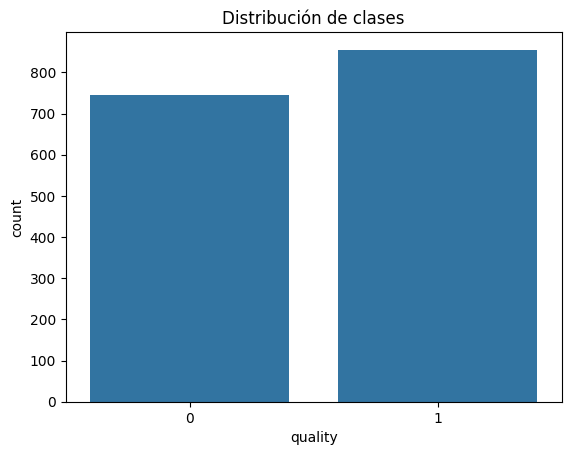

In [37]:
# Visualización de la distribución de las clases
sns.countplot(x='quality', data=datasetWineQuality)
plt.title('Distribución de clases')
plt.show()

In [38]:
# Calcular la matriz de correlación
correlation_matrix = datasetWineQuality.corr()

# Seleccionar las correlaciones de las características con respecto a la calidad del vino
correlation_with_quality = correlation_matrix['quality'].abs().sort_values(ascending=False)

# Mostrar las características con las correlaciones más altas con respecto a la calidad del vino
print("Características con mayor correlación con la calidad del vino:")
print(correlation_with_quality)

Características con mayor correlación con la calidad del vino:
quality                 1.000000
alcohol                 0.434751
volatile acidity        0.321441
total sulfur dioxide    0.231963
sulphates               0.218072
citric acid             0.159129
density                 0.159110
chlorides               0.109494
fixed acidity           0.095093
free sulfur dioxide     0.061757
pH                      0.003264
residual sugar          0.002160
Name: quality, dtype: float64


In [39]:
X = datasetWineQuality.drop(columns=["residual sugar","pH","free sulfur dioxide","fixed acidity",  "quality"]) 
y = datasetWineQuality['quality']

# Dividir los datos en conjuntos de entrenamiento y prueba
trainingDatasetWineQuality, testingDatasetWineQuality, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, )

# Preprocesamiento de datos: Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(trainingDatasetWineQuality)
X_test_scaled = scaler.transform(testingDatasetWineQuality)

In [40]:
# Inicializar y entrenar el clasificador KNN con el mejor valor de k encontrado
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred = knn.predict(X_test_scaled)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.75
Precision: 0.7647058823529411
Recall: 0.7988826815642458
F1-score: 0.7814207650273224
Confusion Matrix:
[[ 97  44]
 [ 36 143]]


In [41]:
# Inicializar y entrenar el clasificador KNN con el mejor valor de k encontrado
knn = KNeighborsClassifier()
knn.fit(trainingDatasetWineQuality, y_train)

# Predecir en el conjunto de prueba
y_pred = knn.predict(testingDatasetWineQuality)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.675
Precision: 0.7142857142857143
Recall: 0.6983240223463687
F1-score: 0.7062146892655368
Confusion Matrix:
[[ 91  50]
 [ 54 125]]
